# Training baseline architecture (x-vectors 2018)

**Imports:**

In [1]:
import torch
from src.nn_models.xvectors_baseline import *
import matplotlib.pyplot as plt 
from sklearn.manifold import TSNE
from pathlib import Path
from os import listdir

**Configuration:**

In [2]:
# training configuration
training_data = Path("/home/joey/School/KNN/speaker-identification/data/vox1_dev/")
testing_data = Path("/home/joey/School/KNN/speaker-identification/data/vox1_test/")
model_params = Path("/home/joey/School/KNN/speaker-identification/model_params.pt")
device = 'cuda' if torch.cuda.is_available() else 'cpu'
epochs = 30
batch_size = 2048
chunk_size = 24

# model declaration:
speakers_count = len(listdir(training_data))
model = XVectorsBaseline(speakers_count, chunk_size).to(device)

if model_params.is_file():
    model.load_state_dict(torch.load(model_params))
    print("Model parameters were loaded!")

# loss and optimizer selection:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

# create training dataset and dataloader:
train_dataset = create_training_mfcc_dataset(training_data, chunk_size)
train_dataloader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

**Training model:**

In [3]:
train_model(model, model_params, epochs, train_dataloader, optimizer, criterion, device)

Epoch 0: loss: 69.70994067192078, accuracy: 19.374, duration: 66.042s
Model params were resaved!

Epoch 1: loss: 62.66858625411987, accuracy: 19.374, duration: 65.72s
Model params were resaved!

Epoch 2: loss: 61.7111611366272, accuracy: 19.374, duration: 66.147s
Model params were resaved!

Epoch 3: loss: 59.607242584228516, accuracy: 23.503, duration: 65.173s
Model params were resaved!

Epoch 4: loss: 55.37318229675293, accuracy: 29.949, duration: 65.182s
Model params were resaved!

Epoch 5: loss: 51.87176871299744, accuracy: 30.363, duration: 65.172s
Model params were resaved!

Epoch 6: loss: 50.955509662628174, accuracy: 33.61, duration: 65.195s
Model params were resaved!

Epoch 7: loss: 47.9631450176239, accuracy: 35.421, duration: 65.169s
Model params were resaved!

Epoch 8: loss: 46.183592081069946, accuracy: 38.569, duration: 65.188s
Model params were resaved!

Epoch 9: loss: 45.262328147888184, accuracy: 39.894, duration: 65.203s
Model params were resaved!

Epoch 10: loss: 42.9

**Visual evaluation of model on testing data:**

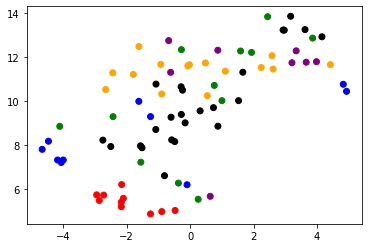

In [6]:
xvectors, labels = get_session_xvectors(model, testing_data, chunk_size, batch_size, device)
xvectors_reduced = TSNE(n_components=2).fit_transform(np.array(xvectors))
colors = ["red", "blue", "green", "orange", "black", "purple"]
plt.scatter(xvectors_reduced[:,0], xvectors_reduced[:,1], c=[colors[l] for l in labels])